In [143]:
import pandas
import geopandas as gp
import pandas as pd
import json
from __future__  import print_function, division
import pylab as pl
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline




from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix




In [75]:
def getdata(string):
    print ("Downloading", string)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + string ):
        if os.path.isfile(string):
            # if in the current dir just move it
            if os.system("mv " + string + ' ' + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            os.system("curl -O https://data.cityofnewyork.us/api/views/jr24-e7cr/rows.csv")
            ###  To move it I use the os.system() functions to run bash commands with arguments
            os.system("mv " + string + ' ' + os.getenv("PUIDATA"))
            
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + string):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [76]:
getdata('rows.csv')

file in place, you can continue


In [77]:
electric = pandas.read_csv( os.getenv("PUIDATA") + '/rows.csv')
#electric.Borough.unique()


In [78]:
electric = electric[(electric['Borough'] == 'MANHATTAN') |(electric['Borough'] == 'BRONX')
                   |(electric['Borough'] == 'BROOKLYN')|(electric['Borough'] == 'QUEENS')|
                   (electric['Borough'] == 'STATEN ISLAND')]


In [79]:
electric = electric[electric['Consumption (KWH)']>100]

In [80]:
electric.drop([ u'Account Name', u'Location',
       u'Meter AMR', u'Meter Scope', u'TDS #', u'EDP', u'RC Code',
       u'Funding Source', u'AMP #', u'Vendor Name', u'UMIS BILL ID',
       u'Revenue Month', u'Service Start Date', u'Service End Date', u'# days',
       u'Meter Number', u'Estimated', u'Current Charges', u'Rate Class',
       u'Bill Analyzed' ] , axis=1 , inplace=True)

In [81]:
electric['KWH Charges']=electric['KWH Charges'].str.replace('$', '')
electric['KWH Charges']=electric['KWH Charges'].str.replace(',', '')
electric['KWH Charges']=electric['KWH Charges'].astype(float).fillna(0.0)

electric['KW Charges']=electric['KW Charges'].str.replace('$', '')
electric['KW Charges']=electric['KW Charges'].str.replace(',', '')
electric['KW Charges']=electric['KW Charges'].astype(float).fillna(0.0)

electric['Other charges']=electric['Other charges'].str.replace('$', '')
electric['Other charges']=electric['Other charges'].str.replace(',', '')
electric['Other charges']=electric['Other charges'].str.replace('(', '')
electric['Other charges']=electric['Other charges'].str.replace(')', '')
electric['Other charges']=electric['Other charges'].astype(float).fillna(0.0)

In [82]:
bronx = electric[electric['Borough']=='BRONX']
man = electric[electric['Borough']=='MANHATTAN']
queens = electric[electric['Borough']=='QUEENS']
staisl = electric[electric['Borough']=='STATEN ISLAND']
brook = electric[electric['Borough']=='BROOKLYN']

In [83]:
#a=bronx.groupby(['Development Name'])
#pandas.DataFrame(a['Development Name'].apply(np.size))
#man_total_consumption = man['Consumption (KWH)'].sum()
#queens_total_consumption = queens['Consumption (KWH)'].sum()
#staisl_total_consumption = staisl['Consumption (KWH)'].sum()
#bronx_total_consumption = bronx['Consumption (KWH)'].sum()
#brook_total_consumption = brook['Consumption (KWH)'].sum()


In [152]:
means = [man['Consumption (KWH)'].mean(), brook['Consumption (KWH)'].mean(), 
         bronx['Consumption (KWH)'].mean(),
        queens['Consumption (KWH)'].mean()]
hwmny = [len(man['Consumption (KWH)']), len(brook['Consumption (KWH)']), 
         len(bronx['Consumption (KWH)']),
        len(queens['Consumption (KWH)'])]

allmeans = [electric['Consumption (KWH)'].mean(),electric['Consumption (KWH)'].mean(),
            electric['Consumption (KWH)'].mean(),
            electric['Consumption (KWH)'].mean(),]
alluser = [len(electric['Consumption (KWH)']),len(electric['Consumption (KWH)']),
          len(electric['Consumption (KWH)']),len(electric['Consumption (KWH)'])]

# KWH Consumption

In [119]:
index4 = np.arange(4)
bar_width = 0.35
opacity = 0.4

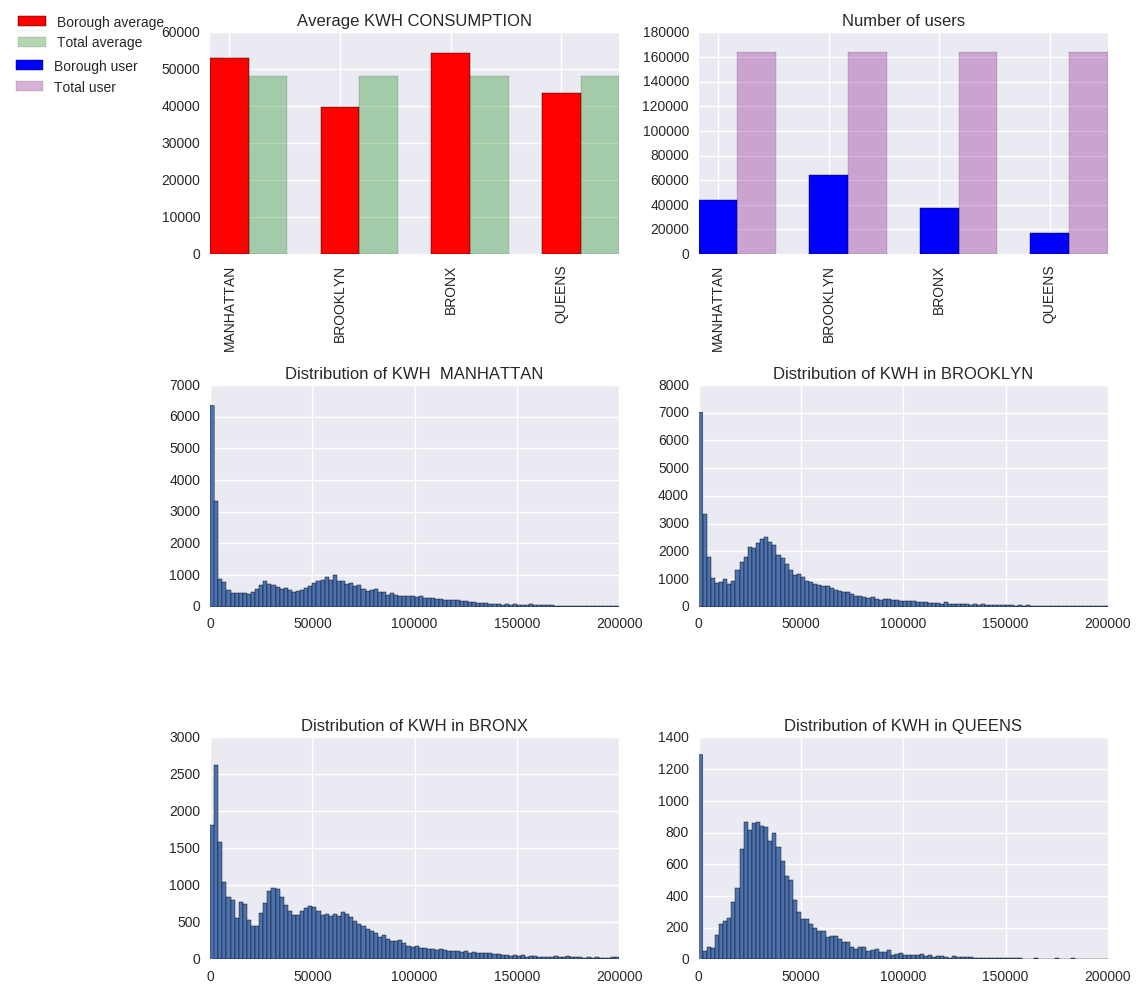

In [191]:
fig, ax = plt.subplots(3,2, figsize=(10,10))


plt.subplot(321)
plt.title('Average KWH CONSUMPTION')
plt.grid(True)
rects1 = plt.bar(index4, means, bar_width,
                 alpha=1,
                 color='r',
                 label='Borough average')
plt.xticks(index5 + bar_width/2 , ('MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS'),
          rotation='vertical')

rects2 = plt.bar(index4+bar_width, allmeans, bar_width,
                 alpha=0.30,
                 color='g',
                 label='Total average')

plt.legend(loc='center left', bbox_to_anchor=(-0.5, 1))

plt.subplot(322)
plt.title('Number of users')
plt.grid(True)
rects1 = plt.bar(index4, hwmny, bar_width,
                 alpha=1,
                 color='b',
                 label='Borough user')
plt.xticks(index5 + bar_width/2 , ('MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS'),
          rotation='vertical')
rects2 = plt.bar(index4+bar_width, alluser, bar_width,
                 alpha=0.30,
                 color='purple',
                 label='Total user')
plt.legend(loc='center left', bbox_to_anchor=(-1.7, 0.8))



plt.subplot(323)
plt.title('Distribution of KWH  MANHATTAN')
plt.grid(True)
plt.hist(man['Consumption (KWH)'], bins=100, range=(0,200000),rwidth=10)



plt.subplot(324)
plt.title('Distribution of KWH in BROOKLYN')
plt.grid(True)
plt.hist(brook['Consumption (KWH)'], bins=100, range=(0,200000),rwidth=10)


plt.subplot(325)
plt.title('Distribution of KWH in BRONX')
plt.grid(True)
plt.hist(bronx['Consumption (KWH)'], bins=100, range=(0,200000),rwidth=10)

plt.subplot(326)
plt.title('Distribution of KWH in QUEENS')
plt.grid(True)
plt.hist(queens['Consumption (KWH)'], bins=100, range=(0,200000),rwidth=10)



plt.tight_layout()



plt.show()

pp = PdfPages('KWH consumption in NY.pdf')
pp.savefig(fig)
pp.close()


In [186]:
plt.hist?